In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

get the titanic dataset

In [4]:
url='https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/refs/heads/master/titanic.csv'

df=pd.read_csv(url)

display the titanic dataset

In [5]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


get the column names of titanic dataset

# UNDERSTANDING THE DATASET

In [6]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')

get the information of each column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


observation: columns like age,fare,cabin,embarked are having missing values.
All columns are having valid dtype(data type)

# DATA CLEANING

In [8]:
# age  column has to be filled with mean
age_mean=df['age'].mean()
# fare column has to be filled with mean
fare_mean=df['fare'].mean()
# embarked  column has to be filled with mode   or ('unknown)
embarked_mode=df['embarked'].mode()[0]

In [9]:
# fillna() -- used to fill the missing values (None,NaN)

df['age']=df['age'].fillna(age_mean)
df['fare']=df['fare'].fillna(fare_mean)
df['embarked']=df['embarked'].fillna(embarked_mode)

In [10]:
# cabin column which has null values has to be removed from dataset
#-------------------------------------------------------------------
# dropna()
# auto detects the rows and columns which are having missing values and removes them
# axis=0 (remove the rows which are having missing values)
# axis=1 (remove the columns which are having missing values)

df=df.dropna(axis=1)

In [11]:
# convert the fare column dtype
#-----------------------------------------
# astype() - used to convert dtype of columns
#          - we have to pass dict -- {'col':dtype , 'col':dtype ,...........}

df=df.astype({'fare':int})

# DATA TRANSFORMATION

In [12]:
df.head(2)

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151,S,1


In [13]:
# df['name'].str.split(',',n=1) # list of elements

temp=df['name'].str.split(',',n=1,expand=True) # list has been converted to columns
last_name=temp[0]
t_fname=temp[1]
courtesy_title=t_fname.str.split('.',n=1,expand=True)[0]
first_name=t_fname.str.split('.',n=1,expand=True)[1]
# last_name , courtesy_title , first_name (series)


In [14]:
# creating new columns
df['courtesy_title']=courtesy_title
df['lname']=last_name
df['fname']=first_name

In [15]:
df.head(2)

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,courtesy_title,lname,fname
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211,S,1,Miss,Allen,Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151,S,1,Master,Allison,Hudson Trevor


In [16]:
df=df.drop(columns=['name'])
# drop() -- used to remove the rows/records
# index=[indices of row]
# columns=[names of column]

In [17]:
df.head(2)

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived,courtesy_title,lname,fname
0,1,female,29.0000,0,0,24160,211,S,1,Miss,Allen,Elisabeth Walton
1,1,male,0.9167,1,2,113781,151,S,1,Master,Allison,Hudson Trevor


In [18]:
df['family_count']=df['sibsp']+df['parch']

In [19]:
df=df.drop(columns=['sibsp','parch'])
df.head(2)



,pclass,sex,age,ticket,fare,embarked,survived,courtesy_title,lname,fname,family_count
0,1,female,29.0000,24160,211,S,1,Miss,Allen,Elisabeth Walton,0
1,1,male,0.9167,113781,151,S,1,Master,Allison,Hudson Trevor,3


In [20]:
# Rename the sex column to gender column
# rename() -- used to change the name of the rows/columns
# for rows --->           index={'old_name' : 'new_name' ,............}
# for columns --->        columns={'old_name' : 'new_name' ,............}
df=df.rename(columns={'sex':'gender'})

In [21]:
df.columns

Index(['pclass', 'gender', 'age', 'ticket', 'fare', 'embarked', 'survived',
       'courtesy_title', 'lname', 'fname', 'family_count'],
      dtype='object')

In [22]:
pd.unique(df['embarked']) # to get unique data in a column



array(['S', 'C', 'Q'], dtype=object)

In [23]:
# replace() --> used to replace the old_values by new_values
#           --> we have to pass dict
df['embarked']=df['embarked'].replace({'S':'Southampton', 'C':'Cherbourg' ,'Q':'Queenstown'})

In [24]:
df.head(2)

,pclass,gender,age,ticket,fare,embarked,survived,courtesy_title,lname,fname,family_count
0,1,female,29.0000,24160,211,Southampton,1,Miss,Allen,Elisabeth Walton,0
1,1,male,0.9167,113781,151,Southampton,1,Master,Allison,Hudson Trevor,3


In [25]:
# creating age_category using age column
df['age_category']=pd.cut(df['age'],bins=[0,2,16,25,49,100],labels=['baby','child','teen','adult','senior'])

In [26]:
df.columns

Index(['pclass', 'gender', 'age', 'ticket', 'fare', 'embarked', 'survived',
       'courtesy_title', 'lname', 'fname', 'family_count', 'age_category'],
      dtype='object')

In [27]:
new_order=['courtesy_title','fname','lname','gender','age','age_category','ticket',
           'pclass','embarked','family_count','fare','survived']

df=df[new_order]

In [28]:
df.head(2)

,courtesy_title,fname,lname,gender,age,age_category,ticket,pclass,embarked,family_count,fare,survived
0,Miss,Elisabeth Walton,Allen,female,29.0000,adult,24160,1,Southampton,0,211,1
1,Master,Hudson Trevor,Allison,male,0.9167,baby,113781,1,Southampton,3,151,1


In [29]:
# pd.unique(df['fare'])

In [30]:

rowid=df[df['fare']==0].index

rowid

Index([   7,   70,  125,  150,  170,  223,  234,  363,  384,  410,  473,  528,
        581,  896,  898,  963, 1254],
      dtype='int64')

In [31]:
df=df.drop(index=[rowid][0]) 

df=df.reset_index(drop=True)

# df

In [32]:
# pd.unique(df['family_count'])

# ANALYSIS

# get the statistical description for all numerical columns

In [33]:
df.describe()  

,age,pclass,family_count,fare,survived
count,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000
mean,29.837829,2.301084,0.895511,33.301858,0.385449
std,12.932916,0.836743,1.590759,51.948287,0.486890
min,0.166700,1.000000,0.000000,3.000000,0.000000
25%,22.000000,2.000000,0.000000,7.000000,0.000000
50%,29.881135,3.000000,0.000000,14.000000,0.000000
75%,35.000000,3.000000,1.000000,31.000000,1.000000
max,80.000000,3.000000,10.000000,512.000000,1.000000


# get top 5 records (passengers data)

In [34]:
df.head()          #by defalult head will fetch top 5 records 

,courtesy_title,fname,lname,gender,age,age_category,ticket,pclass,embarked,family_count,fare,survived
0,Miss,Elisabeth Walton,Allen,female,29.0000,adult,24160,1,Southampton,0,211,1
1,Master,Hudson Trevor,Allison,male,0.9167,baby,113781,1,Southampton,3,151,1
2,Miss,Helen Loraine,Allison,female,2.0000,baby,113781,1,Southampton,3,151,0
3,Mr,Hudson Joshua Creighton,Allison,male,30.0000,adult,113781,1,Southampton,3,151,0
4,Mrs,Hudson J C (Bessie Waldo Daniels),Allison,female,25.0000,teen,113781,1,Southampton,3,151,0


# get the last 5 records

In [35]:
df.tail()          #by defalult tail will fetch bottom/last 5 records 

,courtesy_title,fname,lname,gender,age,age_category,ticket,pclass,embarked,family_count,fare,survived
1287,Miss,Hileni,Zabour,female,14.500000,child,2665,3,Cherbourg,1,14,0
1288,Miss,Thamine,Zabour,female,29.881135,adult,2665,3,Cherbourg,1,14,0
1289,Mr,Mapriededer,Zakarian,male,26.500000,adult,2656,3,Cherbourg,0,7,0
1290,Mr,Ortin,Zakarian,male,27.000000,adult,2670,3,Cherbourg,0,7,0
1291,Mr,Leo,Zimmerman,male,29.000000,adult,315082,3,Southampton,0,7,0


# get the total_no_records

In [36]:
# len(df)                 #1275
df.shape                  #(total no of records=1275, columns=12)
df.shape[0]  
            

1292

# get the total columns

In [37]:
df.shape                       #(total no of records=1275, columns=12)
df.shape[1]            

12

# get the first row

In [38]:
df.head(1)

df.loc[0,::]                          #iloc[row,column]   #according to index=0 is 1st row

courtesy_title                 Miss
fname              Elisabeth Walton
lname                         Allen
gender                       female
age                            29.0
age_category                  adult
ticket                        24160
pclass                            1
embarked                Southampton
family_count                      0
fare                            211
survived                          1
Name: 0, dtype: object

# get the second row

In [39]:
df.loc[1,::]                     #iloc[row,column]   #according to index=1 is 2nd row    #[,::]=all columns

courtesy_title            Master
fname              Hudson Trevor
lname                    Allison
gender                      male
age                       0.9167
age_category                baby
ticket                    113781
pclass                         1
embarked             Southampton
family_count                   3
fare                         151
survived                       1
Name: 1, dtype: object

# get the fname and age of all passengers

In [40]:
df.loc[::,['fname','age']]                #[::,]=all rows   #[,[multiple columns]]

,fname,age
0,Elisabeth Walton,29.000000
1,Hudson Trevor,0.916700
2,Helen Loraine,2.000000
3,Hudson Joshua Creighton,30.000000
4,Hudson J C (Bessie Waldo Daniels),25.000000
...,...,...
1287,Hileni,14.500000
1288,Thamine,29.881135
1289,Mapriededer,26.500000
1290,Ortin,27.000000


# get the 5th and 6th passenger fname ,age and survived details

In [41]:
df.loc[[5,6],['fname','age','survived']]                            #[[desired multiple rows],[]]

,fname,age,survived
5,Harry,48.0,1
6,Kornelia Theodosia,63.0,1


# get the passenger details of pclass 1

In [42]:
cond=df['pclass']==1                     #(bool values)

df.loc[cond,::]                          #loc[ ] provies only the true records 

,courtesy_title,fname,lname,gender,age,age_category,ticket,pclass,embarked,family_count,fare,survived
0,Miss,Elisabeth Walton,Allen,female,29.000000,adult,24160,1,Southampton,0,211,1
1,Master,Hudson Trevor,Allison,male,0.916700,baby,113781,1,Southampton,3,151,1
2,Miss,Helen Loraine,Allison,female,2.000000,baby,113781,1,Southampton,3,151,0
3,Mr,Hudson Joshua Creighton,Allison,male,30.000000,adult,113781,1,Southampton,3,151,0
4,Mrs,Hudson J C (Bessie Waldo Daniels),Allison,female,25.000000,teen,113781,1,Southampton,3,151,0
...,...,...,...,...,...,...,...,...,...,...,...,...
311,Mr,Fletcher Fellows,Williams-Lambert,male,29.881135,adult,113510,1,Southampton,0,35,0
312,Miss,Helen Alice,Wilson,female,31.000000,adult,16966,1,Cherbourg,0,134,1
313,Mr,Hugh,Woolner,male,29.881135,adult,19947,1,Southampton,0,35,1
314,Mr,George,Wright,male,62.000000,senior,113807,1,Southampton,0,26,0


# get the passenger fname and age of pclass 1

In [43]:
cond=df['pclass']==1                               #(bool values)
df.loc[cond,['fname','age']]  
         #(or)

df.loc[(df['pclass']==1),['fname','age']]

,fname,age
0,Elisabeth Walton,29.000000
1,Hudson Trevor,0.916700
2,Helen Loraine,2.000000
3,Hudson Joshua Creighton,30.000000
4,Hudson J C (Bessie Waldo Daniels),25.000000
...,...,...
311,Fletcher Fellows,29.881135
312,Helen Alice,31.000000
313,Hugh,29.881135
314,George,62.000000


# get the male passenger details of pclass 1

In [44]:
cond=(df['gender']=='male') & (df['pclass']==1)               #in pandas & work like AND operator
df.loc[cond,::]

      #or

df.loc[(df['gender']=='male') & (df['pclass']==1),::]


,courtesy_title,fname,lname,gender,age,age_category,ticket,pclass,embarked,family_count,fare,survived
1,Master,Hudson Trevor,Allison,male,0.916700,baby,113781,1,Southampton,3,151,1
3,Mr,Hudson Joshua Creighton,Allison,male,30.000000,adult,113781,1,Southampton,3,151,0
5,Mr,Harry,Anderson,male,48.000000,adult,19952,1,Southampton,0,26,1
8,Mr,Ramon,Artagaveytia,male,71.000000,senior,PC 17609,1,Cherbourg,0,49,0
9,Col,John Jacob,Astor,male,47.000000,adult,PC 17757,1,Cherbourg,1,227,0
...,...,...,...,...,...,...,...,...,...,...,...,...
309,Mr,Charles Duane,Williams,male,51.000000,senior,PC 17597,1,Cherbourg,1,61,0
310,Mr,Richard Norris II,Williams,male,21.000000,teen,PC 17597,1,Cherbourg,1,61,1
311,Mr,Fletcher Fellows,Williams-Lambert,male,29.881135,adult,113510,1,Southampton,0,35,0
313,Mr,Hugh,Woolner,male,29.881135,adult,19947,1,Southampton,0,35,1


# get the female passengers fname who were survived in pclass 1

In [45]:
cond=(df['gender']=='female') & (df['survived']==1) & (df['pclass']==1)
df.loc[cond,['fname']]

,fname
0,Elisabeth Walton
6,Kornelia Theodosia
7,Edward Dale (Charlotte Lamson)
10,John Jacob (Madeleine Talmadge Force)
11,Leontine Pauline
...,...
304,George Dennick (Mary Hitchcock)
307,George Dunton (Eleanor Elkins)
308,Constance
312,Helen Alice


# Get the passengers details whose embarked is Southampton, cherbourg

In [46]:
cond=(df['embarked']=='Southampton') | (df['embarked']=='Cherbouurg')          # | operator work like a OR operator in pandas
df.loc[cond,::]
          
#or

cond=df['embarked'].isin(['Southampton','Cherbourge'])
df.loc[cond,::]


,courtesy_title,fname,lname,gender,age,age_category,ticket,pclass,embarked,family_count,fare,survived
0,Miss,Elisabeth Walton,Allen,female,29.000000,adult,24160,1,Southampton,0,211,1
1,Master,Hudson Trevor,Allison,male,0.916700,baby,113781,1,Southampton,3,151,1
2,Miss,Helen Loraine,Allison,female,2.000000,baby,113781,1,Southampton,3,151,0
3,Mr,Hudson Joshua Creighton,Allison,male,30.000000,adult,113781,1,Southampton,3,151,0
4,Mrs,Hudson J C (Bessie Waldo Daniels),Allison,female,25.000000,teen,113781,1,Southampton,3,151,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1278,Mr,Einar,Windelov,male,21.000000,teen,SOTON/OQ 3101317,3,Southampton,0,7,0
1279,Mr,Albert,Wirz,male,27.000000,adult,315154,3,Southampton,0,8,0
1280,Mr,Phillippe,Wiseman,male,29.881135,adult,A/4. 34244,3,Southampton,0,7,0
1281,Mr,Camille,Wittevrongel,male,36.000000,adult,345771,3,Southampton,0,9,0



# Get the no_of_survivals
# Get the survival rate

In [47]:
cond=df['survived']==1
df.loc[cond,['survived']].count() 
#or 
df.loc[::,['survived']].sum()
#or
df['survived'].sum()


survival_rate=df.loc[::,['survived']].mean()
survival_rate

survived    0.385449
dtype: float64

get the number of missings values in age column (assuming missing values exist)

In [48]:
df['age'].isnull().sum()

np.int64(0)

# Get the no_of passengers
# Get the no_of male passengers

In [49]:
no_of_passengers=df['ticket'].count()
no_of_passengers

cond=df['gender']=='male'
df.loc[cond,['gender']].count()
#or

df.loc[(df['gender']=='male'),['gender']].count()

gender    826
dtype: int64

# Get the highest fare
# Get the lowest fare among female passengers

In [50]:
df['fare'].max()
#or
df.loc[::,['fare']].max()


cond=df['gender']=='female'
df.loc[cond,['fare']].min()

fare    6
dtype: int64

# Get the aggregates for fare column

In [51]:
df.agg({'fare':['count','min','max','mean','sum']})

,fare
count,1292.000000
min,3.000000
max,512.000000
mean,33.301858
sum,43026.000000


# Get the no_of_passengers in each gender

In [52]:
gp_obj=df.groupby(['gender'])
gp_obj['gender'].count()


gender
female    466
male      826
Name: gender, dtype: int64

There were 466 females in the titanic.

There were 826 males in the titanic.

# Get the total fare in each pclass

In [53]:
gp_obj=df.groupby(['pclass'])
gp_obj['fare'].sum()

pclass
1    28129
2     5806
3     9091
Name: fare, dtype: int64

1st-class passengers contributed a total of $28129 in fares.

2nd-class passengers contributed a total of $5806 in fares.

3rd-class passengers contributed a total of $9091 in fares.

# Get the pclass wise survival rate and count

In [54]:
gp_obj=df.groupby(['pclass'])
gp_obj.agg({'survived':['count','mean']})

survived          
          count      mean
pclass                   
1           316  0.629747
2           271  0.439114
3           705  0.255319

316 passengers were in 1st class, with a survival rate of 63%.

271 passengers were in 2nd class, with a survival rate of 47%.

705 passengers were in 3rd class, with a survival rate of 24%.

# Get the pclass,gender wise survival rate

In [55]:
gp_obj=df.groupby(['pclass','gender'])
gp_obj['survived'].mean()

#or
gp_obj.agg({'survived':['mean']})

survived
                   mean
pclass gender          
1      female  0.965278
       male    0.348837
2      female  0.886792
       male    0.151515
3      female  0.490741
       male    0.151329

96% of 1st-class females survived.
34% of 1st-class males survived.

92% of 2nd-class females survived.
15% of 2nd-class males survived.

50% of 3rd-class females survived.
12% of 3rd-class males survived.

# Get the no.of.psgn in each pclass

# Find the pclass in which highest no_of_passengers are there

In [56]:
gp=df.groupby('pclass')
gp['pclass'].count().idxmax()

np.int64(3)

# Find the pclass in which lowest no_of_passengers are there

In [57]:
gp=df.groupby('pclass')
gp['pclass'].count().idxmin

<bound method Series.idxmin of pclass
1    316
2    271
3    705
Name: pclass, dtype: int64>

# Find the no.of.familes travelling

In [58]:
df.groupby('ticket')['ticket'].count()

ticket
110152         3
110413         3
110465         2
110469         1
110489         1
              ..
W./C. 6608     5
W./C. 6609     1
W.E.P. 5734    2
W/C 14208      1
WE/P 5735      2
Name: ticket, Length: 918, dtype: int64

# Find the no.of.familes travelling  and survival rate

In [59]:
df.groupby('ticket').agg({'survived':['count','mean']})


survived          
               count      mean
ticket                        
110152             3  1.000000
110413             3  0.666667
110465             2  0.000000
110469             1  0.000000
110489             1  0.000000
...              ...       ...
W./C. 6608         5  0.000000
W./C. 6609         1  0.000000
W.E.P. 5734        2  0.500000
W/C 14208          1  0.000000
WE/P 5735          2  0.500000

[918 rows x 2 columns]

In [60]:
# df.loc[df['ticket']=='110413',['survived']]   #(optional)

# df.loc[df['ticket']=='110413',::]             #(optional)

#if family count is 0 , that does not mean they are alone.
#if the ticket is same , that does not mean they are family (they might me friends)

# find the correlation between the numerical columns

In [61]:
df.corr(numeric_only=True)

,age,pclass,family_count,fare,survived
age,1.000000,-0.366397,-0.196047,0.174783,-0.049676
pclass,-0.366397,1.000000,0.046349,-0.570109,-0.321205
family_count,-0.196047,0.046349,1.000000,0.222935,0.023038
fare,0.174783,-0.570109,0.222935,1.000000,0.241527
survived,-0.049676,-0.321205,0.023038,0.241527,1.000000


# What is correlation b/w fare and pclass

# what is the correlate b/w fare and survival

# What is correlation b/w age and survival

In [62]:
df.loc[::,['fare','pclass']].corr()

df.loc[::,['fare','survived']].corr()

df.loc[::,['age','survived']].corr()

,age,survived
age,1.000000,-0.049676
survived,-0.049676,1.000000


find the correlation b/w gender and survival

In [63]:
temp=df['gender'].map({'male':0,'female':1})
# print(temp)

df.loc[::,'survived'].corr(temp)

np.float64(0.5278258125759906)

find the correlation b/w age-category and survival

In [64]:
temp=df['age']
df.loc[::,'survived'].corr(temp)

np.float64(-0.04967616651156049)

# Get the pclass wise male and female count and survival rate

In [65]:
gp=df.groupby(['pclass','gender'])
gp.agg({'survived':['count','mean']})


survived          
                 count      mean
pclass gender                   
1      female      144  0.965278
       male        172  0.348837
2      female      106  0.886792
       male        165  0.151515
3      female      216  0.490741
       male        489  0.151329

# Get the age_seg wise no.of.psgns and survival rate

In [66]:
age_segment= pd.cut(df['age'],bins=[0,10,20,30,40,50,60,70,80],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'])

gp=df.groupby([age_segment])
gp.agg({'survived':['count','mean']})



C:\Users\deepa\AppData\Local\Temp\ipykernel_23760\1929276771.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gp=df.groupby([age_segment])


survived          
         count      mean
age                     
0-10        86  0.581395
10-20      161  0.397516
20-30      614  0.335505
30-40      206  0.432039
40-50      130  0.392308
50-60       62  0.483871
60-70       27  0.222222
70-80        6  0.333333

# Get the age_seg which has high_survivale rate

In [67]:
age_segment= pd.cut(df['age'],bins=[0,10,20,30,40,50,60,70,80],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'])

gp=df.groupby([age_segment])
gp.agg({'survived':['mean']}).idxmax()


C:\Users\deepa\AppData\Local\Temp\ipykernel_23760\631513610.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gp=df.groupby([age_segment])


survived  mean    0-10
dtype: category
Categories (8, object): ['0-10' < '10-20' < '20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80']

# Get the gender and age_seg which has high survival rate

In [68]:
age_segment= pd.cut(df['age'],bins=[0,10,20,30,40,50,60,70,80],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'])

gp=df.groupby(['gender',age_segment])
gp['survived'].mean().idxmax()


C:\Users\deepa\AppData\Local\Temp\ipykernel_23760\3076212919.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gp=df.groupby(['gender',age_segment])


('female', '70-80')

# Get the pclass,age_seg,gender in which survival rate is high

In [69]:
age_segment= pd.cut(df['age'],bins=[0,10,20,30,40,50,60,70,80],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'])
gp=df.groupby(['pclass',age_segment,'gender'])
gp['survived'].mean().idxmax()

C:\Users\deepa\AppData\Local\Temp\ipykernel_23760\2489124984.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gp=df.groupby(['pclass',age_segment,'gender'])


(np.int64(1), '0-10', 'male')

# Get the solo travelers full name

In [70]:
so=df[df['family_count']==0]
so['fname']


0        Elisabeth Walton
5                   Harry
8                   Ramon
11       Leontine Pauline
12         Ellen "Nellie"
              ...        
1285                Wazli
1286              Gerious
1289          Mapriededer
1290                Ortin
1291                  Leo
Name: fname, Length: 773, dtype: object

# solo travelers survival rate v/s psngs  with family survival rate

In [71]:
total=df['ticket'].count()

so=df[df['family_count']==0]

a=so['survived']==1
print(a.count()/total)

so=df[df['family_count']>0]
b=so['survived']==1
print(b.count()/total)

df

0.598297213622291
0.40170278637770895


,courtesy_title,fname,lname,gender,age,age_category,ticket,pclass,embarked,family_count,fare,survived
0,Miss,Elisabeth Walton,Allen,female,29.000000,adult,24160,1,Southampton,0,211,1
1,Master,Hudson Trevor,Allison,male,0.916700,baby,113781,1,Southampton,3,151,1
2,Miss,Helen Loraine,Allison,female,2.000000,baby,113781,1,Southampton,3,151,0
3,Mr,Hudson Joshua Creighton,Allison,male,30.000000,adult,113781,1,Southampton,3,151,0
4,Mrs,Hudson J C (Bessie Waldo Daniels),Allison,female,25.000000,teen,113781,1,Southampton,3,151,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1287,Miss,Hileni,Zabour,female,14.500000,child,2665,3,Cherbourg,1,14,0
1288,Miss,Thamine,Zabour,female,29.881135,adult,2665,3,Cherbourg,1,14,0
1289,Mr,Mapriededer,Zakarian,male,26.500000,adult,2656,3,Cherbourg,0,7,0
1290,Mr,Ortin,Zakarian,male,27.000000,adult,2670,3,Cherbourg,0,7,0


# Find the gender and pclass wise survival rate of solo travelers

In [72]:

solo_travellers=df['family_count']==1

gp=df.groupby(['gender','pclass'])
gp['survived'].mean()

gender  pclass
female  1         0.965278
        2         0.886792
        3         0.490741
male    1         0.348837
        2         0.151515
        3         0.151329
Name: survived, dtype: float64

# ------------------------------------

# 1. Plot the total count of male and female passengers.

[Text(0, 0, '466'), Text(0, 0, '826')]

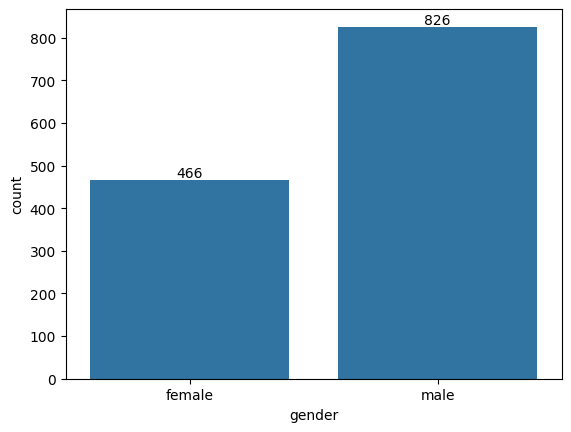

In [73]:
a= sns.countplot(data=df,x='gender')

a.bar_label(a.containers[0])                                                             

# 2. Plot the total count of male and female passengers in each passenger class.

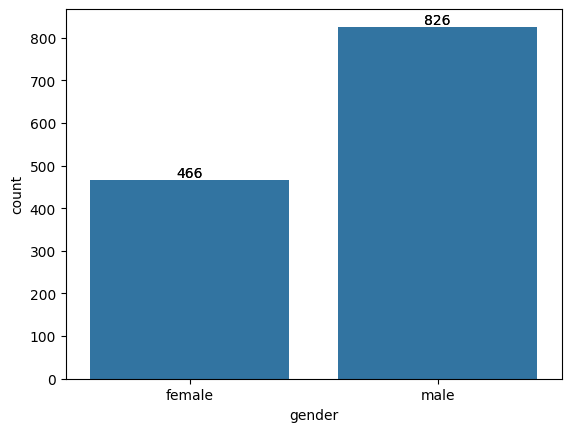

In [74]:
a = sns.countplot(data=df,x='gender')

a.bar_label(a.containers[0])

for c in a.containers:
    a.bar_label(c)


# observation
male and female 

# 3. Plot the count of survived and non-survived passengers.

([<matplotlib.axis.XTick at 0x212be2e5590>,
 [Text(0, 0, 'non survived'), Text(1, 0, 'survived')])

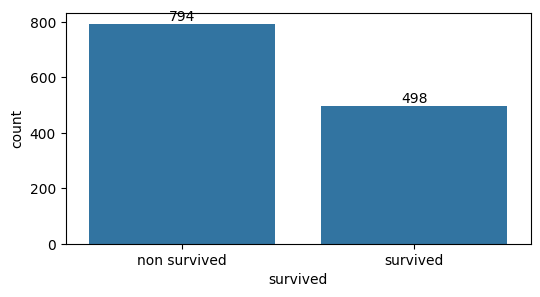

In [75]:
plt.figure(figsize=(6,3))

a=sns.countplot(data=df,x='survived')

a.bar_label(a.containers[0])

plt.xticks([0,1],labels=['non survived','survived'])  

# 4. Plot the gender-wise count of survived and non-survived passengers.

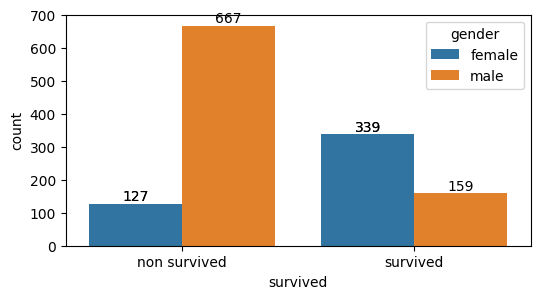

In [76]:
plt.figure(figsize=(6,3))

a=sns.countplot(data=df,x='survived',hue='gender')

a.bar_label(a.containers[0])

plt.xticks([0,1],labels=['non survived','survived'])

for c in a.containers:
    a.bar_label(c)

# observation



# 5. Plot the count of passengers in each age category.

[Text(0, 0, '34'),
 Text(0, 0, '100'),
 Text(0, 0, '307'),
 Text(0, 0, '741'),
 Text(0, 0, '110')]

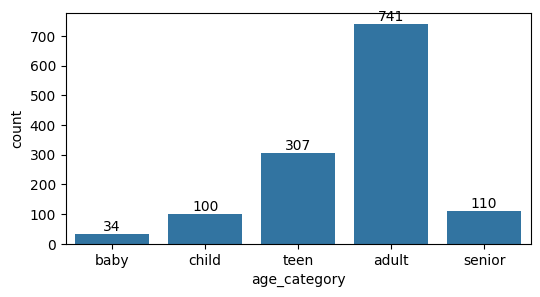

In [77]:
plt.figure(figsize=(6,3))

a=sns.countplot(data=df,x='age_category')

a.bar_label(a.containers[0])


# 6. Plot the count of survived and non-survived passengers in each age category.

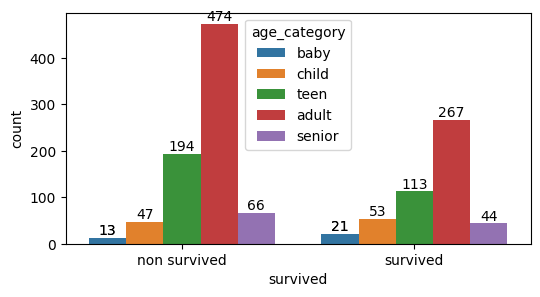

In [78]:
plt.figure(figsize=(6,3))

a=sns.countplot(data=df,x='survived',hue='age_category')

a.bar_label(a.containers[0])

plt.xticks([0,1],labels=['non survived','survived'])

for c in a.containers:
    a.bar_label(c)

# adults are more in which pclass
# adults are more in which gender

<Axes: xlabel='pclass', ylabel='count'>

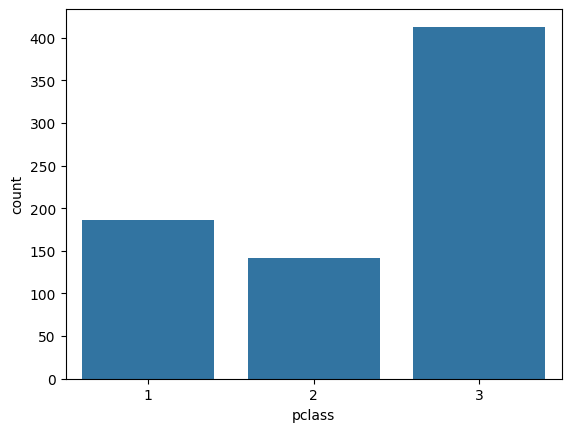

In [79]:

n=df[(df["age_category"]=='adult')]

sns.countplot(data=n,x='pclass')

# 7. Plot the number of passengers who boarded at each port.

# 8. Plot the total fare collected for each passenger class.

[Text(0, 0, '28129'), Text(0, 0, '5806'), Text(0, 0, '9091')]

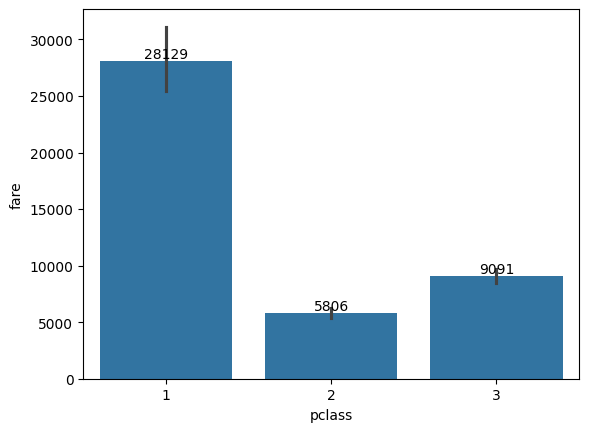

In [80]:
a= sns.barplot(data=df,x='pclass',y='fare',estimator='sum')

a.bar_label(a.containers[0])

# 9. Plot the total fare collected for each gender.

[Text(0, 0, '21328'), Text(0, 0, '21698')]

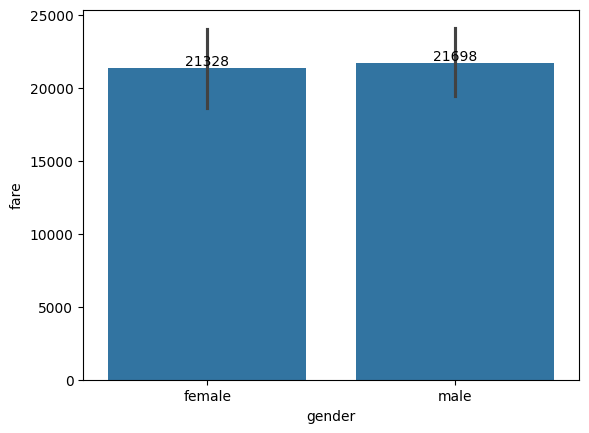

In [81]:
a= sns.barplot(data=df,x='gender',y='fare',estimator='sum')

a.bar_label(a.containers[0])

# 10. Plot the average fare for each passenger class.

[Text(0, 0, '89.0158'), Text(0, 0, '21.4244'), Text(0, 0, '12.895')]

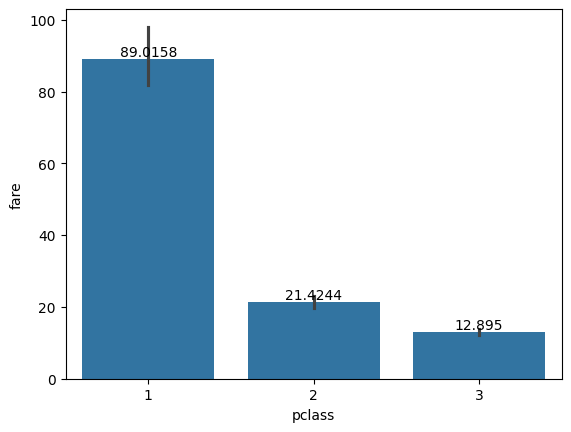

In [82]:
a= sns.barplot(data=df,x="pclass",y="fare",estimator="mean")

a.bar_label(a.containers[0])

# 11. Plot the percentage of passengers in each age category.

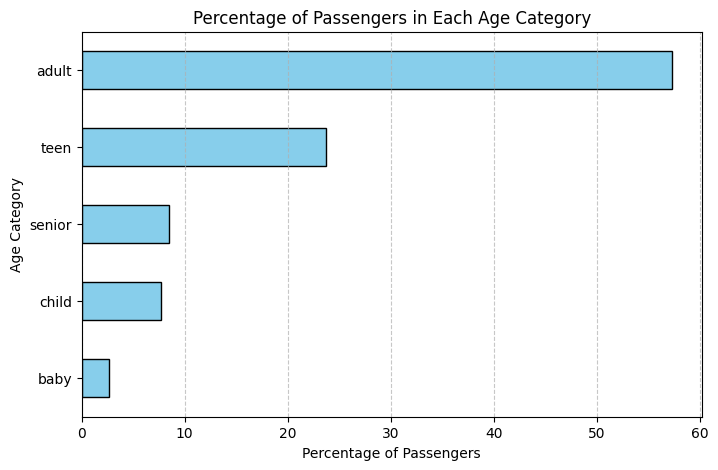

In [83]:

# Calculate percentage of passengers in each category
age_distribution = df['age_category'].value_counts(normalize=True) * 100

# Plot the results
plt.figure(figsize=(8, 5))
age_distribution.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

# Formatting
plt.xlabel("Percentage of Passengers")
plt.ylabel("Age Category")
plt.title("Percentage of Passengers in Each Age Category")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()


# 12. Plot the relationship between fare and passenger class.


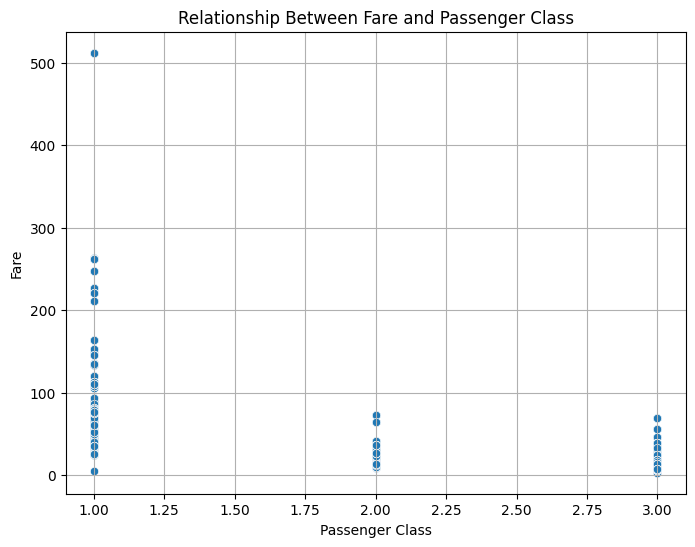

In [84]:
plt.figure(figsize=(8, 6))
a=sns.scatterplot(x='pclass', y='fare', data=df)
plt.title('Relationship Between Fare and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.grid()

# conclusion
we can see from the above graph, when the pclass increases then the fare amount is getting decresed

# 13. Plot the distribution of fares.

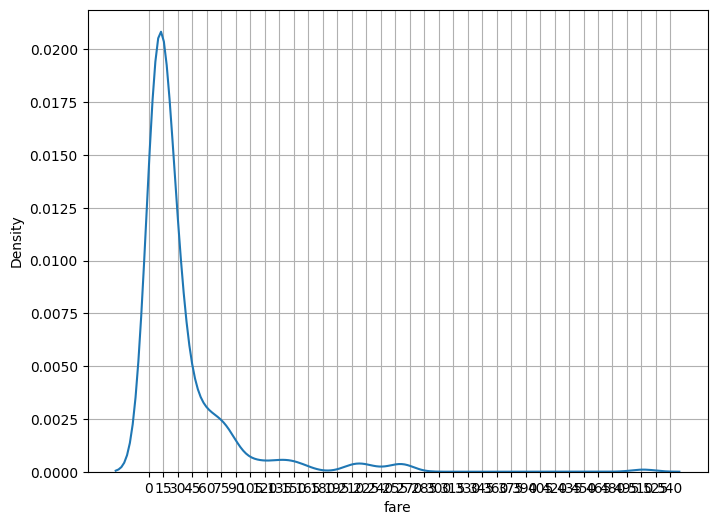

In [85]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df,x="fare")
plt.xticks(np.arange(0,551,15))
plt.grid()

C:\Users\deepa\AppData\Local\Temp\ipykernel_23760\2453287010.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x="fare",hue='gender',shade=True)


<Axes: xlabel='fare', ylabel='Density'>

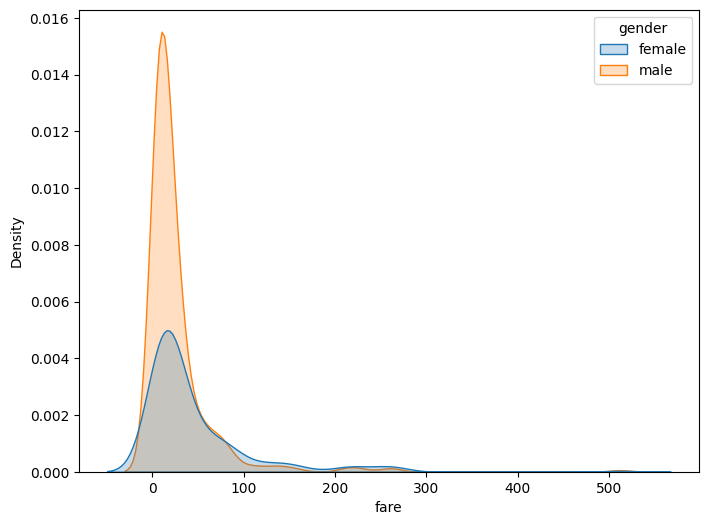

In [86]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df,x="fare",hue='gender',shade=True)


# conclusion 
male passangers has the density around 0.5 and female passangers has the density around 1.55

# 14. Plot the distribution of ages.

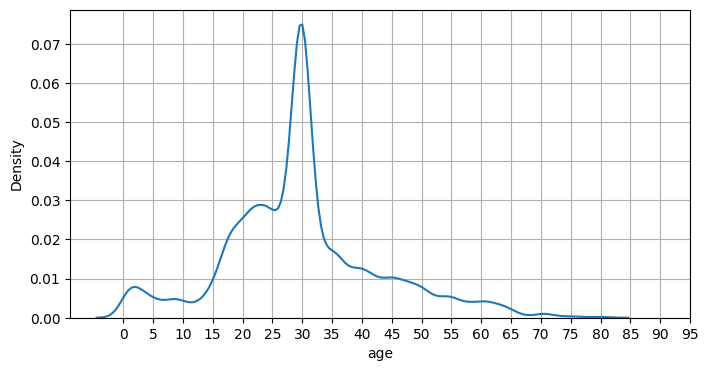

In [87]:

plt.figure(figsize=(8,4))
sns.kdeplot(data=df,x="age",bw_adjust=0.5)
plt.xticks(np.arange(0,100,5))
plt.grid()

# observation

overall age between the age 25 to 35 the density is around 0.8

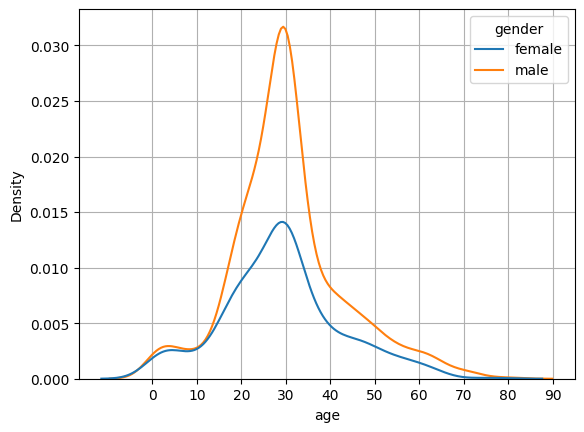

In [88]:
sns.kdeplot(data=df,x="age",hue='gender')
plt.xticks(np.arange(0,100,10))
plt.grid()

# observation



# 15. Plot the survival rate in each passenger class.

[Text(0, 22, '62.97%'), Text(0, 22, '43.91%'), Text(0, 22, '25.53%')]

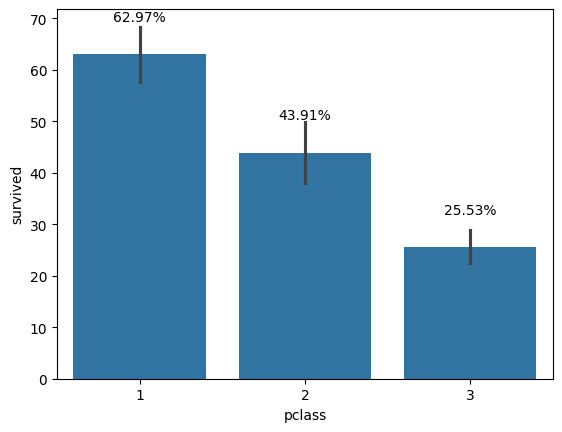

In [89]:
a= sns.barplot(data=df,x="pclass",y="survived",estimator=lambda z:(sum(z)/len(z) *100))   #to shift the . to right side((sum(z)/len(z) *100))
                                                                                             
a.bar_label(a.containers[0],fmt='%.2f%%',padding=22)

The higher the class, the better the survival chances because of better access to lifeboats.

Third-class passengers had the hardest time escaping , so they have less survival rate 


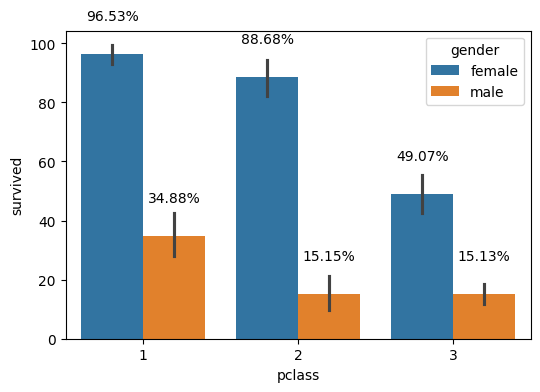

In [90]:
plt.figure(figsize=(6,4))
a= sns.barplot(data=df,x="pclass",
               y="survived",
               hue="gender",
               estimator=lambda z:(sum(z)/len(z) *100))   #to shift the . to right side((sum(z)/len(z) *100))
                                                                                             


for c in  a.containers:
    a.bar_label(c,fmt='%.2f%%',padding=22)


# why female passangers are having high survival chances than male passangers.

Female survival rate: ~74%
Male survival rate: ~18%

Women had higher survival chances because of the "Women and Children First" rule, lifeboat priority, and social norms of the time. Men had lower survival rates because they were expected to sacrifice themselves and had fewer chances to board lifeboats

# 16. Plot the survival rate in each age category.

[Text(0, 0, '61.76%'),
 Text(0, 0, '53.00%'),
 Text(0, 0, '36.81%'),
 Text(0, 0, '36.03%'),
 Text(0, 0, '40.00%')]

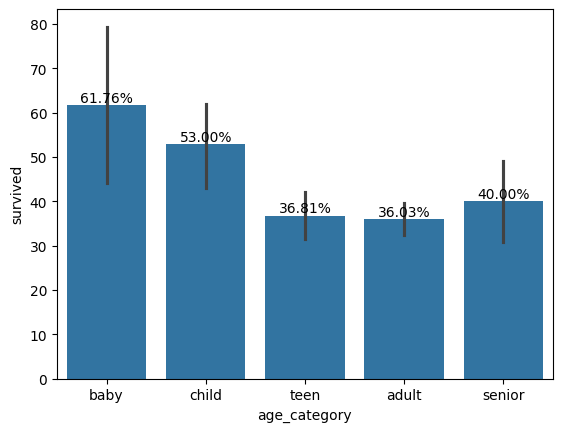

In [91]:
a=sns.barplot(data=df,x="age_category",y="survived",estimator=lambda z:(sum(z)/len(z) *100))

a.bar_label(a.containers[0],fmt="%.2f%%")

# 17. Plot the variation in fare and age.

<Axes: xlabel='fare', ylabel='age'>

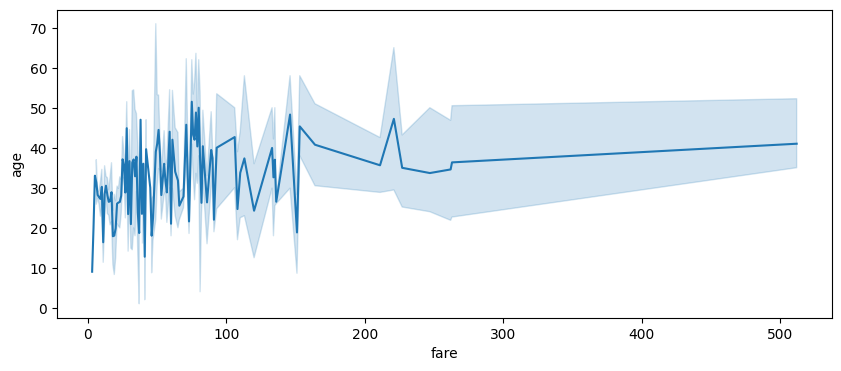

In [92]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df,x="fare",y="age")

Fare increases with class (first-class tickets cost more).

Young children generally paid lower fares (mostly in third class).

Older, wealthy passengers paid the highest fares (mostly first class).

# 18.  Did fare affect survival.


[Text(0, 0, '23.369'), Text(0, 0, '49.1386')]

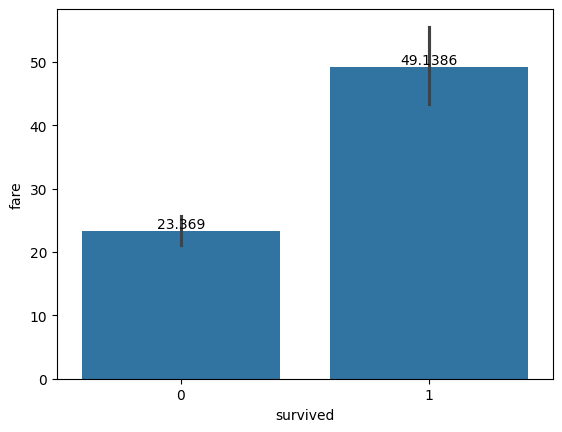

In [93]:
a=sns.barplot(data=df,x='survived',y='fare')

a.bar_label(a.containers[0])


# yes because  fare affected survival because higher fare meant a first-class ticket, which gave better chances of getting on a lifeboat

# 19.  Is there any role of age in survival.

[Text(0, 0, '0.617647'),
 Text(0, 0, '0.53'),
 Text(0, 0, '0.368078'),
 Text(0, 0, '0.360324'),
 Text(0, 0, '0.4')]

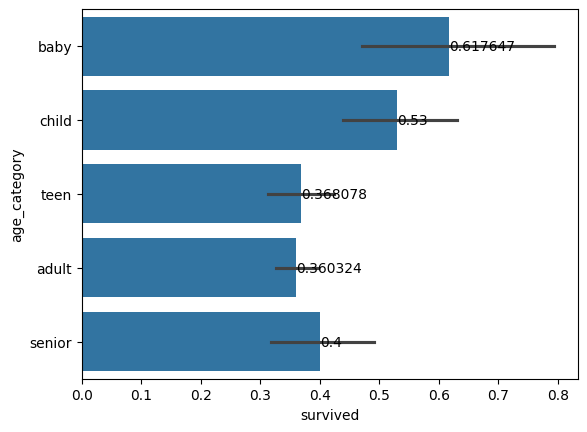

In [94]:
a=sns.barplot(data=df,x='survived',y='age_category')

print()

a.bar_label(a.containers[0])

# Yes, age played a big role in survival. Children had the best chances, while older passengers and young men had lower survival rates.

# 20.  Why did females have more survival chances than males? Which factor influenced this.

# Women had higher survival chances because of the "Women and Children First" rule, lifeboat priority, and social norms of the time. Men had lower survival rates because they were expected to sacrifice themselves and had fewer chances to board lifeboats.